In [10]:
import pandas as pd
import sqlite3

con = sqlite3.connect('../../datasets/checking-logs.sqlite')

## run a query that gets the `datetime` from the `pageviews` table, selecting only the `users` and not the `admins`

In [11]:
df = pd.read_sql_query(
    '''
    WITH views AS (
        SELECT DATE(datetime) AS date, COUNT(datetime) AS views
        FROM pageviews
        WHERE uid LIKE 'user_%'
        GROUP BY DATE(datetime)
    ), commits AS (
        SELECT DATE(timestamp) AS date, COUNT(timestamp) AS commits
        FROM checker
        WHERE uid LIKE 'user_%'
        GROUP BY DATE(timestamp)
    )
    SELECT v.date, v.views, c.commits
    FROM views v
    INNER JOIN commits c ON v.date = c.date 
    ''',
    con,
    parse_dates=['date'],
    index_col='date',
)
df

,views,commits
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


## using Pandas method `.plot()`, create a graph
* the size of the font should be 8
* the size of the figure is (15,8)
* the graph must have the title Views per day
* notice the rotation of xticks on the graph below

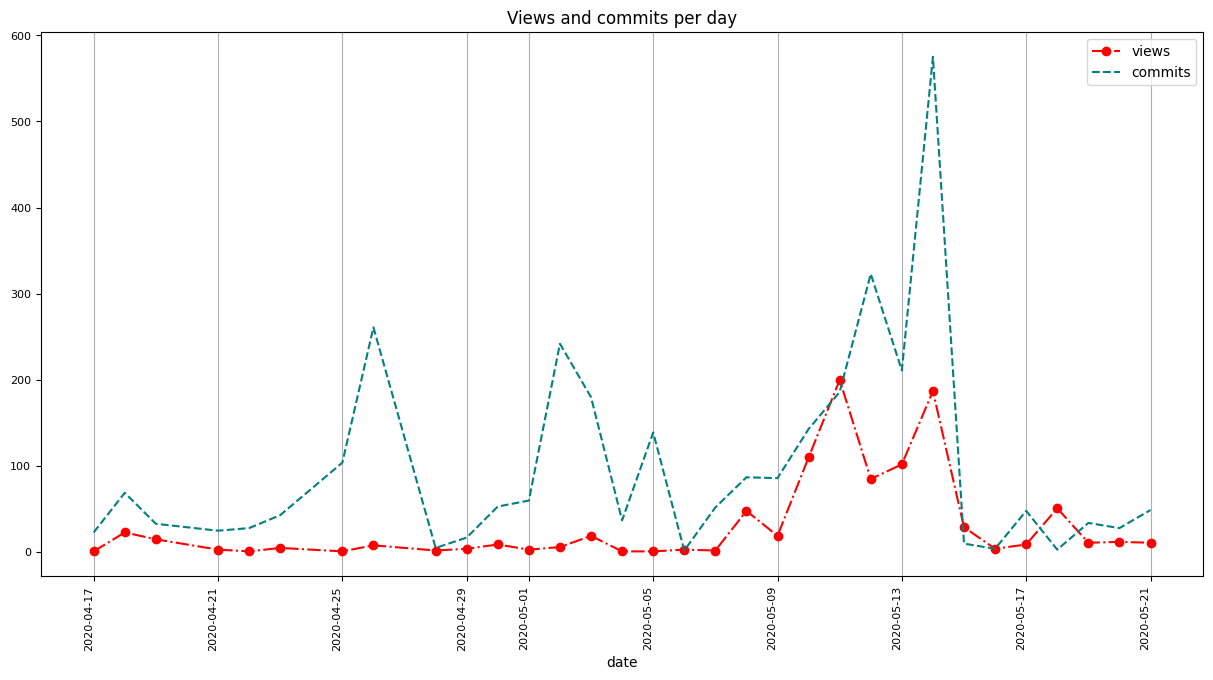

In [12]:
df.plot(
    fontsize=8,
    figsize=(15, 8),
    title='Views and commits per day',
    style=['o-.', '--'],
    color=['red', 'teal'],
    rot=90,
).grid(axis='x')

## How many times was the number of views larger than 150?
The answer is 2

## close the connection to the database

In [13]:
con.close()